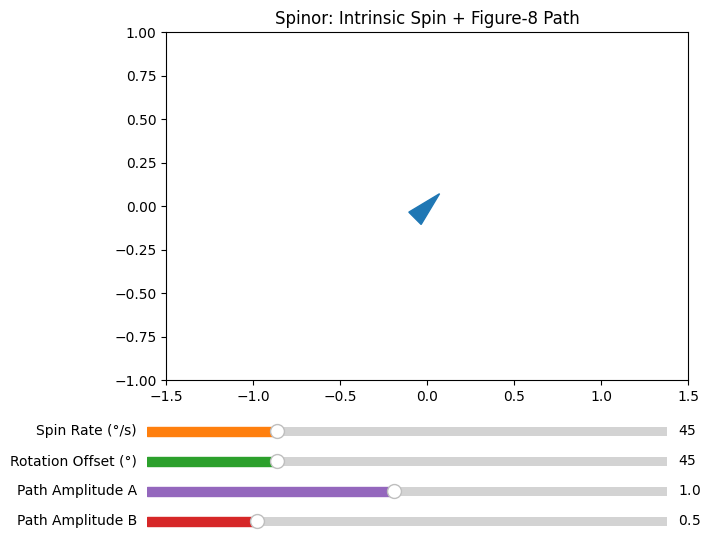

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider

# ========================
# Simulation Parameters
# ========================

# Time step for the animation (seconds)
dt = 0.05

# Default intrinsic spin rate (in degrees per second).
# (A spin rate of 45°/unit time means the object rotates 45 degrees every second.)
default_spin_rate_deg = 45.0  

# Default constant offset in rotation (in degrees). This offset will be added to the intrinsic spin.
# (This can be interpreted as a fixed tilt in the spinor’s orientation.)
default_rotation_offset_deg = 45.0

# Figure‐8 (Lissajous) path amplitudes in x and y directions:
default_A = 1.0   # amplitude for the x-direction (sinusoidal)
default_B = 0.5   # amplitude for the y-direction (sinusoidal with double frequency)

# ========================
# Define the “Spinor” Shape
# ========================
# We represent the spinor as an arrow-like polygon defined in local coordinates.
# The arrow points to the right in its local frame.
L = 0.2  # arrow length
W = 0.1  # arrow width

# Define vertices of a simple arrow polygon (in local coordinates)
# The arrow is defined so that its tip is at (L/2, 0) and its base is to the left.
arrow_shape = np.array([
    [-L/2, -W/2],
    [ L/2,  0.0],
    [-L/2,  W/2]
])

# ========================
# Set Up the Figure and Axes
# ========================
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.3)  # leave space at the bottom for sliders

# Set equal aspect ratio for proper geometry display
ax.set_aspect('equal', 'box')

# Set axis limits to display both the figure-8 path and the spinning arrow
ax.set_xlim(-default_A - 0.5, default_A + 0.5)
ax.set_ylim(-default_B - 0.5, default_B + 0.5)
ax.set_title("Spinor: Intrinsic Spin + Figure-8 Path")

# Create an initial arrow patch (as a Polygon) at the origin.
# (We will update its vertices in the animation.)
arrow_patch = plt.Polygon(arrow_shape, closed=True, color='tab:blue')
ax.add_patch(arrow_patch)

# ========================
# Create Interactive Sliders
# ========================
# We create three sliders:
#   1. Spin Rate (in degrees per second)
#   2. Rotation Offset (in degrees)
#   3. Amplitudes A (x-axis amplitude) and B (y-axis amplitude) for the figure-8

# Slider for intrinsic spin rate
ax_spin = plt.axes([0.15, 0.20, 0.65, 0.03])
slider_spin = Slider(
    ax=ax_spin,
    label="Spin Rate (°/s)",
    valmin=0,
    valmax=180,
    valinit=default_spin_rate_deg,
    valstep=1,
    color='tab:orange'
)

# Slider for rotation offset (adds a constant angular shift)
ax_offset = plt.axes([0.15, 0.15, 0.65, 0.03])
slider_offset = Slider(
    ax=ax_offset,
    label="Rotation Offset (°)",
    valmin=0,
    valmax=180,
    valinit=default_rotation_offset_deg,
    valstep=1,
    color='tab:green'
)

# Slider for path amplitude in x-direction (A)
ax_A = plt.axes([0.15, 0.10, 0.65, 0.03])
slider_A = Slider(
    ax=ax_A,
    label="Path Amplitude A",
    valmin=0.1,
    valmax=2.0,
    valinit=default_A,
    valstep=0.05,
    color='tab:purple'
)

# Slider for path amplitude in y-direction (B)
ax_B = plt.axes([0.15, 0.05, 0.65, 0.03])
slider_B = Slider(
    ax=ax_B,
    label="Path Amplitude B",
    valmin=0.1,
    valmax=2.0,
    valinit=default_B,
    valstep=0.05,
    color='tab:red'
)

# ========================
# Animation Update Function
# ========================
def update(frame):
    """
    Update the position and orientation of the arrow (spinor) for each animation frame.
    
    There are two simultaneous motions:
    - The arrow’s center follows a figure-8 (Lissajous) path:
          x(t) = A * sin(t)
          y(t) = B * sin(2t)
      where A and B are the amplitudes (controlled by sliders).
    
    - The arrow itself rotates about its center:
          θ(t) = (spin_rate [in rad/s]) * t + rotation_offset
      where the spin_rate and rotation_offset (both in radians) are controlled by sliders.
    
    The rotated arrow is obtained by applying a 2D rotation matrix R(θ) to the local arrow_shape.
    """
    # Current time (in seconds)
    t = frame * dt

    # Read current slider values and convert degrees to radians where needed
    current_spin_rate = np.deg2rad(slider_spin.val)       # intrinsic spin rate in rad/s
    current_offset = np.deg2rad(slider_offset.val)          # constant rotation offset in rad
    current_A = slider_A.val  # amplitude for x-motion
    current_B = slider_B.val  # amplitude for y-motion

    # Compute the center position of the arrow along the figure-8 (Lissajous) path.
    # Here, we choose a Lissajous pattern: x = A*sin(t), y = B*sin(2t)
    x_center = current_A * np.sin(t)
    y_center = current_B * np.sin(2*t)
    center = np.array([x_center, y_center])
    
    # Compute the instantaneous rotation angle of the arrow:
    # The arrow spins intrinsically at current_spin_rate and gets an additional constant offset.
    theta = current_spin_rate * t + current_offset
    
    # Construct the 2D rotation matrix:
    #    R(θ) = [[cosθ, -sinθ],
    #            [sinθ,  cosθ]]
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])
    
    # Apply the rotation matrix to each vertex of the arrow (defined in local coordinates)
    # and then translate by the center position.
    rotated_arrow = arrow_shape.dot(R.T) + center

    # Update the arrow polygon's vertices for the animation.
    arrow_patch.set_xy(rotated_arrow)
    
    return arrow_patch,

# ========================
# Create and Run the Animation
# ========================
# The FuncAnimation will call update(frame) repeatedly.
anim = FuncAnimation(
    fig,       # the figure object to animate
    update,    # the function that updates the animation
    frames=np.arange(0, 600),  # number of frames (here: 600 frames ≅ 30 seconds)
    interval=50,               # delay between frames in milliseconds
    blit=True
)

# Display the plot window with the animation and sliders.
plt.show()


In [18]:
#!/usr/bin/env python3
"""
Cayley–Dickson Multiplication Table Generator

Given an integer n, the code constructs the multiplication table
for the hypercomplex algebra of dimension 2^n, where the basis elements
are labeled as e0, e1, ... , e_(2^n - 1) and the product is defined by:

   e_i * e_j = (cd_twist(i, j)) * e_(i XOR j)

Here, cd_twist(i, j) returns either +1 or -1 according to

   cd_twist(i, j) = (-1)^(phi(i,j))
   where phi(i,j) = sum_{k=0}^{n-1} { (bit_k(i)) * (sum_{l=0}^k bit_l(j)) }.

This formula reproduces:
  - For n = 1 (Complex numbers): e1 * e1 = -e0.
  - For n = 2 (Quaternions): e1 * e2 = +e3, e2 * e1 = -e3, etc.
"""

def cd_twist(i, j, n):
    """
    Compute the Cayley–Dickson twist factor for basis indices i and j,
    where i, j are integers in the range 0 .. 2^n - 1.
    
    The twist is given by:
    
        cd_twist(i,j) = (-1)^(phi(i,j))
    
    with
        phi(i,j) = sum_{k=0}^{n-1} [ (bit_k(i)) * (sum_{l=0}^k bit_l(j)) ].
        
    Parameters:
      i, j: nonnegative integers (basis indices).
      n: the number of binary digits (the algebra has dimension 2^n).
    
    Returns:
      +1 or -1.
    """
    phi = 0
    for k in range(n):
        # (i >> k) & 1 extracts the k-th bit of i.
        if (i >> k) & 1:
            sumbits = 0
            # Sum bits of j from bit 0 up to and including bit k.
            for l in range(k + 1):
                sumbits += (j >> l) & 1
            phi += sumbits
    return -1 if (phi % 2) == 1 else 1

def cayley_dickson_table(n):
    """
    Build the multiplication table for the Cayley–Dickson algebra of dimension 2^n.
    
    The basis elements are labeled e0, e1, ..., e_(2^n - 1) and the product is:
    
         e_i * e_j = (cd_twist(i,j)) * e_(i XOR j)
    
    Parameters:
      n: integer >= 1
      
    Returns:
      table: a 2^n x 2^n list of strings representing the product of basis elements.
    """
    d = 2 ** n
    # Create a d x d table (list of lists)
    table = [["" for _ in range(d)] for _ in range(d)]
    for i in range(d):
        for j in range(d):
            sign = cd_twist(i, j, n)
            k = i ^ j  # bitwise XOR
            # Format the entry as a string: e.g., "+e3" or "-e0"
            entry = ("+e{}".format(k)) if sign == 1 else ("-e{}".format(k))
            table[i][j] = entry
    return table

def print_table(table):
    """
    Nicely print a multiplication table (list of lists) with tab–separated columns.
    """
    for row in table:
        print("\t".join(row))

def main():
    try:
        n = int(input("Enter n (n=1 for Complex, n=2 for Quaternions, n=3 for Octonions, etc.): "))
        if n < 1:
            raise ValueError
    except ValueError:
        print("Please enter a positive integer (n >= 1).")
        return
    
    table = cayley_dickson_table(n)
    dim = 2 ** n
    print("\nCayley–Dickson Multiplication Table for dimension {} (2^{})".format(dim, n))
    # Optionally, print a header row for basis element labels:
    header = ["e{}".format(j) for j in range(dim)]
    print("     " + "\t"+"\t".join(header))
    for i, row in enumerate(table):
        print("e{:<3}".format(i) + "\t" + "\t".join(row))

if __name__ == '__main__':
    main()



Cayley–Dickson Multiplication Table for dimension 16 (2^4)
     	e0	e1	e2	e3	e4	e5	e6	e7	e8	e9	e10	e11	e12	e13	e14	e15
e0  	+e0	+e1	+e2	+e3	+e4	+e5	+e6	+e7	+e8	+e9	+e10	+e11	+e12	+e13	+e14	+e15
e1  	+e1	-e0	+e3	-e2	+e5	-e4	+e7	-e6	+e9	-e8	+e11	-e10	+e13	-e12	+e15	-e14
e2  	+e2	-e3	-e0	+e1	+e6	-e7	-e4	+e5	+e10	-e11	-e8	+e9	+e14	-e15	-e12	+e13
e3  	+e3	+e2	-e1	-e0	+e7	+e6	-e5	-e4	+e11	+e10	-e9	-e8	+e15	+e14	-e13	-e12
e4  	+e4	-e5	-e6	+e7	-e0	+e1	+e2	-e3	+e12	-e13	-e14	+e15	-e8	+e9	+e10	-e11
e5  	+e5	+e4	-e7	-e6	-e1	-e0	+e3	+e2	+e13	+e12	-e15	-e14	-e9	-e8	+e11	+e10
e6  	+e6	+e7	+e4	+e5	-e2	-e3	-e0	-e1	+e14	+e15	+e12	+e13	-e10	-e11	-e8	-e9
e7  	+e7	-e6	+e5	-e4	-e3	+e2	-e1	+e0	+e15	-e14	+e13	-e12	-e11	+e10	-e9	+e8
e8  	+e8	-e9	-e10	+e11	-e12	+e13	+e14	-e15	-e0	+e1	+e2	-e3	+e4	-e5	-e6	+e7
e9  	+e9	+e8	-e11	-e10	-e13	-e12	+e15	+e14	-e1	-e0	+e3	+e2	+e5	+e4	-e7	-e6
e10 	+e10	+e11	+e8	+e9	-e14	-e15	-e12	-e13	-e2	-e3	-e0	-e1	+e6	+e7	+e4	+e5
e11 	+e11	-e10	+e9	-e8	-e15	+e14	-e13	+e12	-e3	+e2	-e1	

In [16]:
#!/usr/bin/env python3
"""
Multiplication of Hypercomplex Elements via the Cayley–Dickson Construction

This script lets the user specify the dimension parameter n (so that the algebra
has dimension 2^n) and then input two elements as linear combinations of the
basis elements e0, e1, ..., e_{2^n-1}. The multiplication is defined via the rule

    e_i * e_j = cd_twist(i,j) * e_(i XOR j)

where the twist function is given by

    cd_twist(i, j) = (-1)^(phi(i,j))
    with phi(i, j) = sum_{k=0}^{n-1} [ (bit_k(i)) * (sum_{l=0}^{k} (bit_l(j)) ) ].

This reflects the structural observations you made.
"""

import re

def cd_twist(i, j, n):
    """
    Compute the Cayley–Dickson twist factor for basis indices i and j.
    
    Parameters:
      i, j: integers in 0,1,...,2^n - 1 (basis indices)
      n: the number of binary digits (algebra dimension is 2^n)
    
    Returns:
      +1 or -1 according to
          (-1)^(sum_{k=0}^{n-1} [ (bit_k(i))*(sum_{l=0}^k (bit_l(j)) ) ])
    """
    phi = 0
    for k in range(n):
        if (i >> k) & 1:  # if the k-th bit of i is 1
            sumbits = 0
            for l in range(k+1):
                sumbits += (j >> l) & 1
            phi += sumbits
    return -1 if (phi % 2) == 1 else 1

def multiply_elements(e1, e2, n):
    """
    Multiply two hypercomplex elements in a Cayley–Dickson algebra of dimension 2^n.
    
    Both e1 and e2 are represented as dictionaries mapping basis index (int) to coefficient.
    The product is computed using distributivity and the rule:
    
         e_i * e_j = cd_twist(i, j, n) * e_(i XOR j)
    
    Parameters:
      e1, e2: dict {index: coefficient} representing the two elements.
      n: integer (the algebra dimension is 2^n).
      
    Returns:
      result: dict {index: coefficient} representing the product.
    """
    result = {}
    for i, a in e1.items():
        for j, b in e2.items():
            sign = cd_twist(i, j, n)
            k = i ^ j  # bitwise XOR of i and j gives the index for the product basis element
            coeff = a * b * sign
            result[k] = result.get(k, 0) + coeff
    return result

def parse_element(s):
    """
    Parse a string representing an element in the algebra.
    
    The expected format is a sum of terms of the form:
         ± [coefficient]e[index]
    where the coefficient is optional (default 1 if missing) and e[index] indicates the basis element.
    If no "e" is given, the term is taken as a scalar (basis element e0).
    
    Example input: "1 + 2e1 - 3e2" represents 1*e0 + 2*e1 - 3*e2.
    
    Returns:
      element: dict mapping basis index (int) to coefficient (float).
    """
    # Remove spaces and ensure the string starts with a sign
    s = s.replace(" ", "")
    if s[0] not in "+-":
        s = "+" + s
    # Regex to capture terms of the form ([+-]) (number possibly with decimal) (optional: e(index))
    pattern = r"([+-])(\d*(?:\.\d+)?)(?:e(\d+))?"
    matches = re.findall(pattern, s)
    element = {}
    for sign, coeff_str, idx_str in matches:
        sign_val = 1 if sign == '+' else -1
        coeff = float(coeff_str) if coeff_str != "" else 1.0
        coeff *= sign_val
        # if idx_str is empty, treat it as index 0
        idx = int(idx_str) if idx_str != "" else 0
        element[idx] = element.get(idx, 0) + coeff
    return element

def format_element(element):
    """
    Format an element (dict mapping index to coefficient) into a string.
    Terms with zero coefficient are omitted.
    """
    terms = []
    # Sort by index (optional)
    for idx in sorted(element.keys()):
        coeff = element[idx]
        # Skip if coefficient is zero (or nearly zero)
        if abs(coeff) < 1e-12:
            continue
        # Format the coefficient: omit the coefficient if it is 1 or -1 and idx != 0.
        if idx == 0:
            term = f"{coeff:.3g}"
        else:
            if abs(coeff - 1) < 1e-12:
                term = f"e{idx}"
            elif abs(coeff + 1) < 1e-12:
                term = f"-e{idx}"
            else:
                term = f"{coeff:.3g}e{idx}"
        terms.append(term)
    return " + ".join(terms).replace("+ -", "- ")

def main():
    print("Hypercomplex Element Multiplication via Cayley–Dickson Construction")
    try:
        n = int(input("Enter n (n=1 for Complex, n=2 for Quaternions, n=3 for Octonions, etc.): "))
        if n < 1:
            raise ValueError
    except ValueError:
        print("Please enter a positive integer (n >= 1).")
        return

    dim = 2 ** n
    print(f"\nThis algebra has dimension {dim} (basis elements e0, e1, ..., e{dim-1}).")
    
    print("\nEnter the first element (e.g., '1 + 2e1 - 3e2'):")
    s1 = input().strip()
    e1 = parse_element(s1)
    
    print("\nEnter the second element (e.g., '4 - e1 + 0.5e3'):")
    s2 = input().strip()
    e2 = parse_element(s2)
    
    product = multiply_elements(e1, e2, n)
    print("\nResult of multiplication:")
    print(format_element(product))

if __name__ == '__main__':
    main()


Hypercomplex Element Multiplication via Cayley–Dickson Construction

This algebra has dimension 8 (basis elements e0, e1, ..., e7).

Enter the first element (e.g., '1 + 2e1 - 3e2'):


IndexError: string index out of range

In [20]:
#!/usr/bin/env python3
"""
Multiplication Table with Block and Reversal Structure for Hypercomplex Numbers

This script uses the Cayley–Dickson construction to build the multiplication table
for an algebra of dimension 2^n (n=1 gives complex numbers, n=2 quaternions, n=3 octonions,
n=4 sedenions, etc.). It then splits the table into four equal blocks (A, B, C, D)
and demonstrates two reversal methods for columns as suggested by your observations.

The Cayley–Dickson rule is:
    e_i * e_j = cd_twist(i, j) * e_(i XOR j)
where
    cd_twist(i, j) = (-1)^(phi(i, j))
and
    phi(i, j) = sum_{k=0}^{n-1} [ (bit_k(i)) * (sum_{l=0}^k (bit_l(j)) ) ].
"""

def cd_twist(i, j, n):
    """Compute the Cayley–Dickson twist factor for basis indices i and j."""
    phi = 0
    for k in range(n):
        if (i >> k) & 1:  # if the k-th bit of i is 1
            sumbits = 0
            for l in range(k+1):
                sumbits += (j >> l) & 1
            phi += sumbits
    return -1 if (phi % 2) == 1 else 1

def build_table(n):
    """
    Build the multiplication table for the Cayley–Dickson algebra of dimension 2^n.
    Returns a 2^n x 2^n table where each entry is a tuple (s, k)
    representing s * e_k, with s in {+1, -1}.
    """
    d = 2**n
    table = [[None for _ in range(d)] for _ in range(d)]
    for i in range(d):
        for j in range(d):
            s = cd_twist(i, j, n)
            k = i ^ j  # bitwise XOR gives the new basis index
            table[i][j] = (s, k)
    return table

def split_table(table):
    """
    Split a 2^n x 2^n table into four equally sized blocks:
        A | B
       ---+---
        C | D
    Returns a dictionary with keys 'A', 'B', 'C', 'D'.
    """
    d = len(table)
    mid = d // 2
    A = [row[:mid] for row in table[:mid]]
    B = [row[mid:] for row in table[:mid]]
    C = [row[:mid] for row in table[mid:]]
    D = [row[mid:] for row in table[mid:]]
    return {'A': A, 'B': B, 'C': C, 'D': D}

def format_entry(entry):
    """Format a single table entry (s, k) as a string like '+e3' or '-e0'."""
    s, k = entry
    return ("+e{}".format(k)) if s==1 else ("-e{}".format(k))

def print_table(table, title="Multiplication Table"):
    """Print the full table in a formatted way."""
    print("\n" + title)
    for row in table:
        print("\t".join(format_entry(e) for e in row))
        
def print_block(block, label):
    """Print a block (a submatrix) with a given label."""
    print(f"\nBlock {label}:")
    for row in block:
        print("\t".join(format_entry(e) for e in row))
        
def reverse_column_in_pairs(column):
    """
    Reverse the column in pairs.
    For example, for a column [a, b, c, d, ...] group as [(a, b), (c, d), ...] and reverse each pair.
    """
    new_col = []
    for i in range(0, len(column), 2):
        pair = column[i:i+2]
        new_col.extend(pair[::-1])
    return new_col

def reverse_column_full(column):
    """Reverse the entire column."""
    return column[::-1]

def demo_column_reversal(table):
    """
    Demonstrate the column reversal rules.
    For each column of the full table (here, we use the first column of the table as a base),
    if the column index is odd, reverse in pairs; if even, reverse fully.
    """
    d = len(table)
    print("\nColumn reversal demonstration (using columns from the full table):")
    for j in range(d):
        # extract the j-th column as a list of entries
        col = [table[i][j] for i in range(d)]
        if j % 2 == 1:
            reversed_col = reverse_column_in_pairs(col)
            method = "pairs reversal"
        else:
            reversed_col = reverse_column_full(col)
            method = "full reversal"
        formatted_original = [format_entry(e) for e in col]
        formatted_reversed = [format_entry(e) for e in reversed_col]
        print(f"Column {j} ({method}):")
        print("  Original: " + "  ".join(formatted_original))
        print("  Reversed: " + "  ".join(formatted_reversed))
        
def main():
    try:
        n = int(input("Enter n (n=1 for Complex, n=2 for Quaternions, n=3 for Octonions, n=4 for Sedenions, etc.): "))
        if n < 1:
            raise ValueError
    except ValueError:
        print("Please enter a positive integer (n >= 1).")
        return

    d = 2**n
    print(f"\nConstructing a Cayley–Dickson algebra of dimension {d} (basis elements e0, e1, …, e{d-1}).")
    
    # Build full multiplication table.
    full_table = build_table(n)
    print_table(full_table, title="Full Multiplication Table")
    
    # Split table into four blocks.
    blocks = split_table(full_table)
    print_block(blocks['A'], "A (upper left)")
    print_block(blocks['B'], "B (upper right)")
    print_block(blocks['C'], "C (lower left)")
    print_block(blocks['D'], "D (lower right)")
    
    # Compare blocks (ignoring signs).
    def block_ignore_sign(block):
        return [[k for (s, k) in row] for row in block]
    
    A_nosign = block_ignore_sign(blocks['A'])
    D_nosign = block_ignore_sign(blocks['D'])
    B_nosign = block_ignore_sign(blocks['B'])
    C_nosign = block_ignore_sign(blocks['C'])
    
    print("\nObservations (ignoring signs):")
    if A_nosign == D_nosign:
        print("Block A equals Block D (ignoring signs).")
    else:
        print("Block A does NOT equal Block D (ignoring signs).")
    if B_nosign == C_nosign:
        print("Block B equals Block C (ignoring signs).")
    else:
        print("Block B does NOT equal Block C (ignoring signs).")
    
    # Demonstrate column reversal rules.
    demo_column_reversal(full_table)
    
if __name__ == '__main__':
    main()



Constructing a Cayley–Dickson algebra of dimension 16 (basis elements e0, e1, …, e15).

Full Multiplication Table
+e0	+e1	+e2	+e3	+e4	+e5	+e6	+e7	+e8	+e9	+e10	+e11	+e12	+e13	+e14	+e15
+e1	-e0	+e3	-e2	+e5	-e4	+e7	-e6	+e9	-e8	+e11	-e10	+e13	-e12	+e15	-e14
+e2	-e3	-e0	+e1	+e6	-e7	-e4	+e5	+e10	-e11	-e8	+e9	+e14	-e15	-e12	+e13
+e3	+e2	-e1	-e0	+e7	+e6	-e5	-e4	+e11	+e10	-e9	-e8	+e15	+e14	-e13	-e12
+e4	-e5	-e6	+e7	-e0	+e1	+e2	-e3	+e12	-e13	-e14	+e15	-e8	+e9	+e10	-e11
+e5	+e4	-e7	-e6	-e1	-e0	+e3	+e2	+e13	+e12	-e15	-e14	-e9	-e8	+e11	+e10
+e6	+e7	+e4	+e5	-e2	-e3	-e0	-e1	+e14	+e15	+e12	+e13	-e10	-e11	-e8	-e9
+e7	-e6	+e5	-e4	-e3	+e2	-e1	+e0	+e15	-e14	+e13	-e12	-e11	+e10	-e9	+e8
+e8	-e9	-e10	+e11	-e12	+e13	+e14	-e15	-e0	+e1	+e2	-e3	+e4	-e5	-e6	+e7
+e9	+e8	-e11	-e10	-e13	-e12	+e15	+e14	-e1	-e0	+e3	+e2	+e5	+e4	-e7	-e6
+e10	+e11	+e8	+e9	-e14	-e15	-e12	-e13	-e2	-e3	-e0	-e1	+e6	+e7	+e4	+e5
+e11	-e10	+e9	-e8	-e15	+e14	-e13	+e12	-e3	+e2	-e1	+e0	+e7	-e6	+e5	-e4
+e12	+e13	+e14	+e15	+e8	+e9	+e10	+e11	-e4	-e5

In [21]:
def apply_main_diagonal_fix(table):
    """
    Corrects the main diagonal so that it starts with e0, followed by -e0 for the rest.
    """
    d = len(table)
    for i in range(d):
        if i == 0:
            table[i][i] = (1, 0)  # e0
        else:
            table[i][i] = (-1, 0)  # -e0 for the rest
    return table

def apply_column_correction(blocks):
    """
    Correct column vectors according to the observed properties:
      - Block C: First element positive, rest negative.
      - Block D: First element -e0, rest positive.
      - Block B: Starts positive, then negative for the rest of the diagonal.
    """
    C = blocks['C']
    D = blocks['D']
    B = blocks['B']
    
    # Fixing C column-wise
    for j in range(len(C[0])):
        for i in range(len(C)):
            s, k = C[i][j]
            if i == 0:
                C[i][j] = (1, k)  # First element positive
            else:
                C[i][j] = (-1, k)  # Rest negative
    
    # Fixing D column-wise
    for j in range(len(D[0])):
        for i in range(len(D)):
            s, k = D[i][j]
            if i == 0:
                D[i][j] = (-1, 0)  # First element -e0
            else:
                D[i][j] = (1, k)   # Rest positive
    
    # Fixing B diagonal
    for i in range(len(B)):
        s, k = B[i][i]
        if i == 0:
            B[i][i] = (1, k)  # First element positive
        else:
            B[i][i] = (-1, k) # Rest negative
    
    return blocks

def main():
    try:
        n = int(input("Enter n (n=1 for Complex, n=2 for Quaternions, etc.): "))
        if n < 1:
            raise ValueError
    except ValueError:
        print("Please enter a positive integer (n >= 1).")
        return

    d = 2**n
    print(f"\nConstructing Cayley–Dickson algebra of dimension {d}.")
    
    # Build full multiplication table and apply fixes
    full_table = build_table(n)
    full_table = apply_main_diagonal_fix(full_table)
    
    # Split table into blocks and apply corrections
    blocks = split_table(full_table)
    blocks = apply_column_correction(blocks)
    
    # Print corrected blocks
    print_block(blocks['A'], "A (upper left)")
    print_block(blocks['B'], "B (upper right, corrected)")
    print_block(blocks['C'], "C (lower left, corrected)")
    print_block(blocks['D'], "D (lower right, corrected)")
    
main()



Constructing Cayley–Dickson algebra of dimension 8.

Block A (upper left):
+e0	+e1	+e2	+e3
+e1	-e0	+e3	-e2
+e2	-e3	-e0	+e1
+e3	+e2	-e1	-e0

Block B (upper right, corrected):
+e4	+e5	+e6	+e7
+e5	-e4	+e7	-e6
+e6	-e7	-e4	+e5
+e7	+e6	-e5	-e4

Block C (lower left, corrected):
+e4	+e5	+e6	+e7
-e5	-e4	-e7	-e6
-e6	-e7	-e4	-e5
-e7	-e6	-e5	-e4

Block D (lower right, corrected):
-e0	-e0	-e0	-e0
+e1	+e0	+e3	+e2
+e2	+e3	+e0	+e1
+e3	+e2	+e1	+e0
